# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

# Is the distribution of body temperature normal?

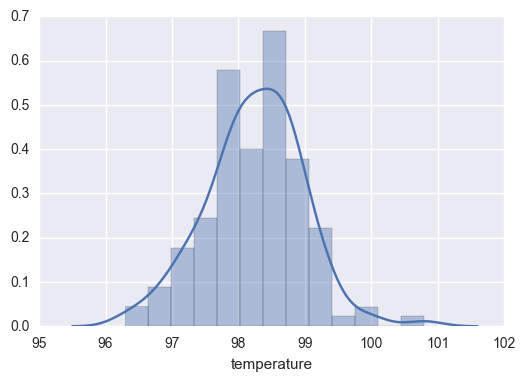

In [6]:
sns.distplot(df.temperature)

Yes, the distribution of temperature observations is normal.
<br>
<br>
<br>

# Is the sample size large? Are the observations independent? 

In [10]:
len(df.temperature)

130

Since the sample size is greater than 30 it is considered large.

The independence of the observations is a bit more complicated question to answer. In order for the observations to be independent, they would have to be random samples from a large population. The source of this dataset indicates that this data is a reproduction of the originally collected data. 

>These data are derived from a dataset presented in Mackowiak, P. A.,
>Wasserman, S. S., and Levine, M. M.  (1992), "A Critical Appraisal of
>98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and
>Other Legacies of Carl Reinhold August Wunderlich," _Journal of the
>American Medical Association_, 268, 1578-1580.  Data were constructed
>to match as closely as possible the histograms and summary statistics
>presented in that article.

The original dataset was sourced as follows:

>DESIGN:
>    Descriptive analysis of baseline oral temperature data from volunteers participating in
>    Shigella vaccine trials conducted at the University of Maryland Center for Vaccine 
>    Development, Baltimore.

>SETTING:
>    Inpatient clinical research unit.

>PARTICIPANTS:
>    One hundred forty-eight healthy men and women aged 18 through 40 years.

>MAIN MEASUREMENTS:
>    Oral temperatures were measured one to four times daily for 3 consecutive days using an electronic digital thermometer

Considering that each observation is from a separate individual, and although the individuals are from the same geographic region and are volunteers in vaccine trials, that group is random enough to be considered independent.

It's also important that the individuals are healthy, as indicated by the study, this is true.

<br>
<br>
<br>

# Is the true population mean really 98.6 degrees F? 

Lets assume the null hypothesis is true, and that hypothesis is that the population mean is $98.6^{\circ}F$

$H_{0}: \mu = 98.6$

With that assumption we will try and find sufficient evidence to reject that hypothesis granting the alternate hypothesis, truth. The alternate hypothesis is that the population mean does not equal $98.6^{\circ}F$

$H_{a}: \mu \not= 98.6$

We will use a two-tailed $Z$ statistic since the sample size is large enough to use a $Z$ statistic and we do not care if the true mean is below or above 98.6, just that it is not 98.6

We will accept a significance level of 5% to reject this hypothesis.

In [11]:
df.temperature.mean()

98.24923076923078

In [35]:
# difference of means
df.temperature.mean() - 98.6

-0.35076923076921673

The sample mean is $\approx 98.25$ and the difference of our hypothesis and our sample mean is $\approx -0.35$

We don't know the population standard deviation, but we can use our sample standard deviation as an estimate. And what we really want to know is the standard deviation of our sample mean, in order to get that we divide our sample standard deviation by the square root of the sample size.

$\sigma \approx \frac{S}{\sqrt{n}}$ 

In [40]:
pop_std_approx = df.temperature.std() / math.sqrt(len(df.temperature))
pop_std_approx

0.06430441683789101

Now in order to find out how significant the difference of our sample and the hypothesized mean is, we can calculate a z-score which tells us how many standard deviations away from the mean our difference is. This can be translated into a p-value which will tell us how likely our result is given that the null hypothesis is true.

To find the Z-score we subtract our population mean by the sample mean and divide by our approximation of the population standard deviation.

$Z = \frac{\bar x - \mu}{\sigma}$

In [36]:
z = (df.temperature.mean() - 98.6) / pop_std_approx
z

-5.454823292364079

Since our critical Z-value for a 5% significance threshold is 1.95, this is more than sufficient evidence to reject the null hypothesis.

To find our critical Z-value, we can use the percent-point function. Given a probability, the percent-point function will tell us what the value is in that distrubition at which the probability is less than or equal to the value provided.

In other words, if we give it .025 for a normal distribution it will return the number of standard deviations away from the mean at which 2.5% of the distribution is at or below. 

Since we are doing a two-tailed test we need our significance value divided by two to cover both sides of the distribution, which is why we want the Z-score for 2.5%.

In [28]:
abs(stats.norm.ppf(.025))

1.9599639845400545

We can also get the p-value for our Z-score above by using the cumulative distribution function over the normal distribution. 

This function will tell us the cumulative area under the curve at a given point in the distribution. So provided a Z-score it will give us the probability of a value falling at or below that point.

To get a two-tailed p-value for this we need the cdf value for the absolute value of our Z-score and we need to subtract from it the cdf value of our Z-score. Then we need to subtract that value from one, since what the cdf value tells us is what is at or below the given score and we want to know what's above it.

In [39]:
1 - (stats.norm.cdf(abs(z)) - stats.norm.cdf(z))

4.9021570136531523e-08

So the chance that we found this mean due to random chance given that the null hypothesis is true is less than .000005%

It is appropriate here to use the Z-test because the distribution of data is approximately normal, we have a sufficiently large sample size, and the observations are independent. Thus meeting the requirements of the central limit theorem.

We can do a t-test for this data as well, though the result will indicate a larger p-value than the z-test becuase the t distribution has 'fatter' tails, meaning the probability of extreme values is larger than the normal distribution. 

With that, given we have such a small p-value, we will still reject the null hypothesis with a t-test.

In [34]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

So our t-statistic is -5.45, with a p-value of $\approx 2.41*10^{-7}$

Which tells us that there is less than a .000024% chance of finding our sample mean if the null hypothesis is true under the t-distribution. Which again is definitely significant enough to reject the null.
<br>
<br>
<br>

# At what temperature should we consider someone's temperature to be "abnormal"? 

We'll consider any body temperature that is more than three standard deviations away from the mean as *abnormal*. Our best estimate of the population standard deviation is $\approx 0.064$.

We choose two standard deviations because under the normal distribution this encompasses 99% of the population.

So for body temperature our confidence interval of where an average person's body temperature lies within is:

$\mu \pm 3*\sigma$

$\approx 98.25 \pm 3*0.064$

$ = [98.05, 98.44]$

So if a person's temperature is above $98.44^{\circ}F$ or below $98.05^{\circ}F$ then we will consider it abnormal.

<br>
<br>

# Is there a significant difference between males and females in normal temperature? 

In [52]:
men = df[df.gender == 'M']
len(men)

65

In [53]:
women = df[df.gender == 'F']
len(women)

65

In [54]:
men.temperature.mean()

98.1046153846154

In [55]:
women.temperature.mean()

98.39384615384613

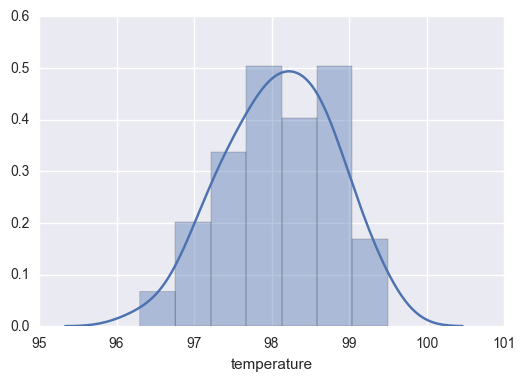

In [89]:
sns.distplot(men.temperature)
None

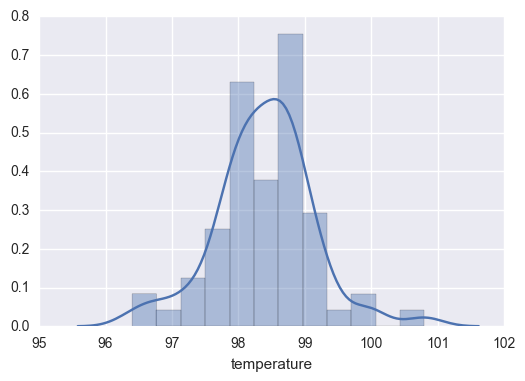

In [88]:
sns.distplot(women.temperature)
None

The sample size of both samples is large, and the distributions are approximately normal. But we do not know the population standard deviation so we will do a t-test. We will assume the null hypothesis of both means being equal as true.

$H_{0}: \mu_{0} - \mu_{1} = 0$

$H_{a}: \mu_{0} - \mu_{1} \ne 0$

In [67]:
stats.ttest_ind(men.temperature, women.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

With a p-value of 0.024 this is telling us that we have less than a 2.4% chance of a difference in average body temperatures between males and females showing up on average.
<br>
<br>
<br>

# Are women's bodies warmer than men's?

There is a slight, yet significant difference between the body temperatures of men and women when sample data was tested.

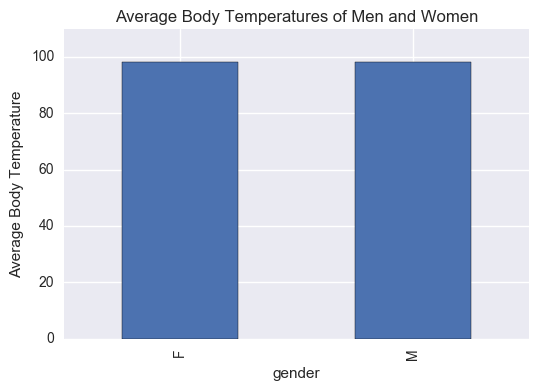

In [103]:
ax = df.groupby('gender').mean()['temperature'].plot(kind='bar', title='Average Body Temperatures of Men and Women')
ax.set_ylim([0,110])
ax.set_ylabel('Average Body Temperature')
None

A statistical test of significance indicated that the difference between average recorded body temperatures for men and women is significant enough to be publishable. However, as we can see, the size of this effect is very small. 

In fact, the actual temperature difference between these two samples is 0.28 degrees Ferenheit.

So while there may be a statistically significant difference, with an effect size so small, would you consider the difference significant?